In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [3]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [4]:
print(mnist['DESCR'])

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [5]:
mnist['data']

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
mnist['target']

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [15]:
X, y= mnist['data'], mnist['target'].astype(int)

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

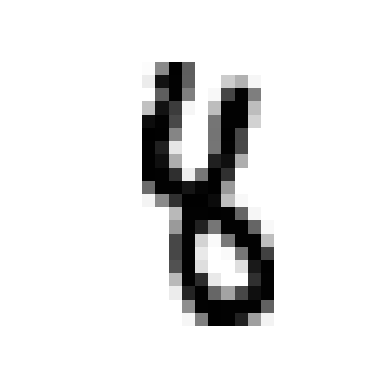

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
num=7000
digit=X.iloc[num].values
image=digit.reshape(28, 28)
plt.imshow(image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")

In [9]:
y[num]

'8'

splitting into train and test sets must be done before a close examination of the data

In [16]:
in_training=60000
X_train, y_train, X_test, y_test = X.iloc[:in_training], y.iloc[:in_training], X.iloc[in_training:], y.iloc[in_training:]

shuffling must be done to ensure that in cross validation, no folds miss any digit and not many instances of the same digit occur consecutively, as it is a problem for some ml algorithms (overfitting)

In [21]:
shuffled_indices=np.random.permutation(in_training)
X_train, y_train = X_train.iloc[shuffled_indices], y_train.iloc[shuffled_indices]

In [11]:
y_train

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: class, Length: 60000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

stochastic gradient descent has a random parameter so it helps to set a random state for reproducibility.

In [18]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

y_train_5


0         True
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997     True
59998    False
59999    False
Name: class, Length: 60000, dtype: bool

In [19]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [20]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds=StratifiedKFold(n_splits=3, random_state=42, shuffle=True)
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf=clone(sgd_clf)
    X_train_folds=X_train.iloc[train_index]
    y_train_5_folds=y_train_5.iloc[train_index]
    X_test_fold=X_train.iloc[test_index]
    y_train_5_fold_test=y_train_5.iloc[test_index]
    clone_clf.fit(X_train_folds, y_train_5_folds)
    y_pred=clone_clf.predict(X_test_fold)
    n_correct=sum( y_pred== y_train_5_fold_test)
    print(n_correct/len(y_pred))


0.9669
0.91625
0.96785


In [ ]:
y_train_pred = sgd_clf.predict(X_train)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_pred, y_train_5)

array([[47621,   326],
       [ 6958,  5095]])

confusion matrix has the shape TN : FP | FN : TP. precision measures of the total positives how many were correct. recall measures of all the true cases, how many were marked positive.

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score
f1_score(y_train_pred, y_train_5)

0.5831521117088245

f1_score is the harmonic mean of precision and recall and that is useful because hm gives more weight to the smaller number, so score can only be large when both precision and recall are large. 

In [ ]:
from sklearn.model_selection import cross_val_predict   #  cross val predict is nice, we predict using other values, without seeing the value at that row ever
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

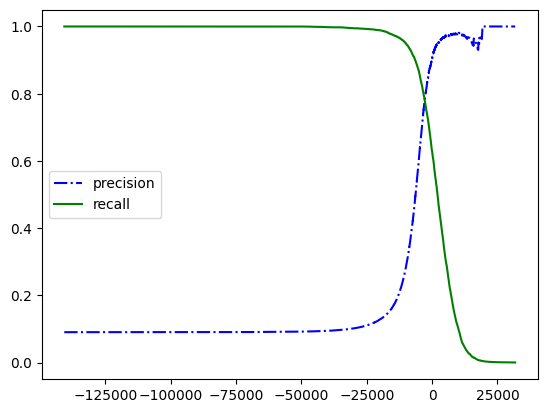

In [ ]:
%matplotlib inline
plt.plot(thresholds, precisions[:-1], 'b-.', label="precision")
plt.plot(thresholds, recalls[:-1], 'g-', label="recall")
plt.legend(loc='center left')

precision is bumpy because as we move forward, we may be excluding true positives. this cant happen with recall, as we move forward, true positives decrease only. 

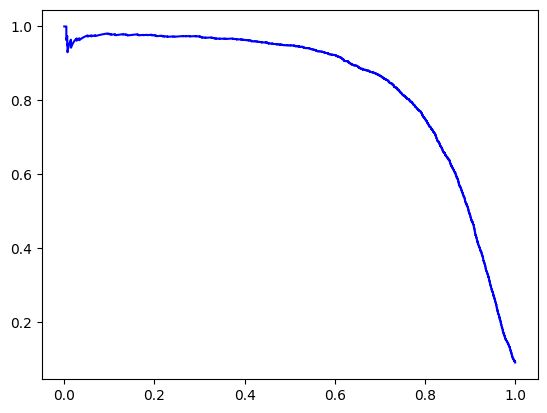

In [ ]:
plt.plot(recalls[:-1], precisions[:-1], 'b-')

TPR=recall, FPR=1-TNR=FP/(FP+TN). TNR=specificity, TPR=sensitivity
ROC=Reciever operating characteristic
TPR vs FPR

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

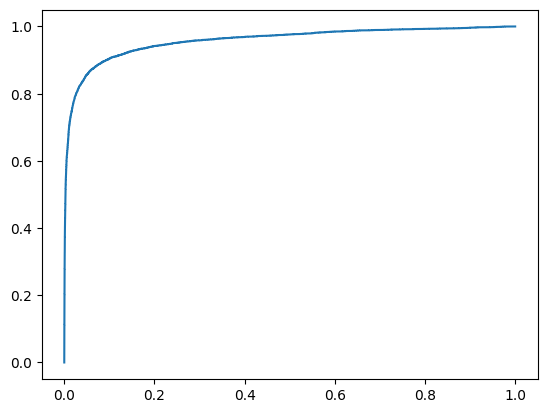

In [ ]:
plt.plot(fpr, tpr)

when the positive class is rare, ROC is not much use, use PR. when positive class is frequent use ROC. Also when false positives are to be lowered, use PR. for false negatives. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf=RandomForestClassifier(random_state=20)
y_probas=cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [ ]:
y_scores=y_probas[ : , 1]
fpr, tpr, thresholds =roc_curve(y_train_5, y_scores)

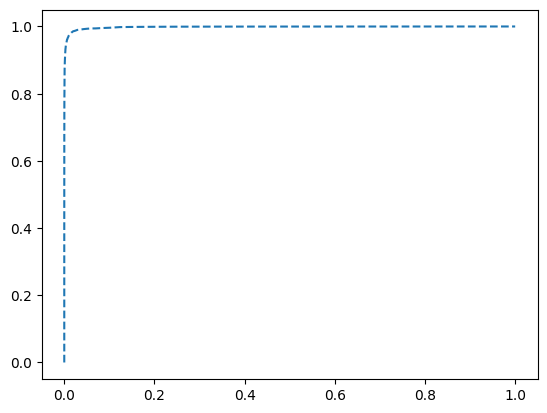

In [ ]:
plt.plot(fpr, tpr, "--")

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9982502495270273

In [ ]:
sgd_clf=SGDClassifier(random_state=20)
y_preds=cross_val_predict(sgd_clf, X_train, y_train, cv=3)

In [ ]:
sgd_clf_2=SGDClassifier(random_state=10)
sgd_clf_2.fit(X_train, y_train)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [ ]:
conf_mat=confusion_matrix(y_train, y_preds)

In [ ]:
sgd_clf_2.predict([digit])

/home/aditya/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array(['3'], dtype='<U1')

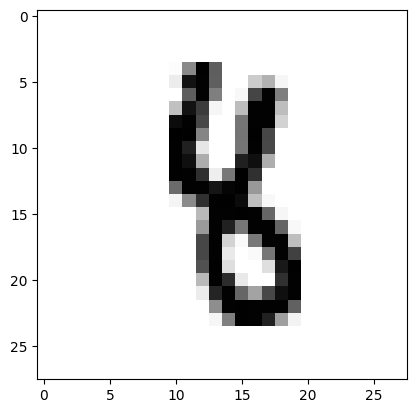

In [ ]:
plt.imshow(digit.reshape(28, -1), cmap=plt.cm.binary)

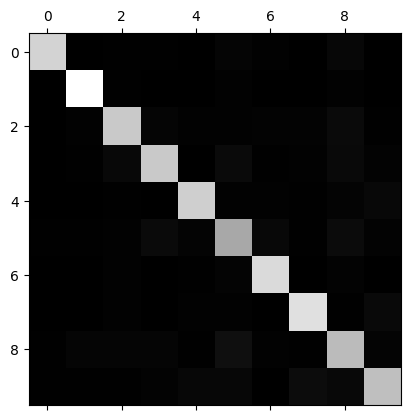

In [ ]:
plt.matshow(conf_mat, cmap=plt.cm.gray)

In [ ]:
todiv=np.sum(conf_mat, axis=1)

In [ ]:
norm_conf_mat=conf_mat/todiv
np.fill_diagonal(norm_conf_mat, 0)

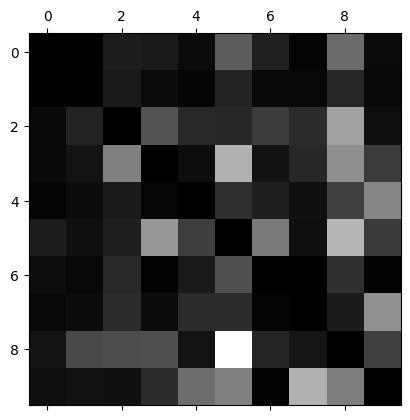

In [ ]:
plt.matshow(norm_conf_mat, cmap=plt.cm.gray)

In [ ]:
import math

In [ ]:
def show_digit(arr, images_per_line):
    arr=arr.to_numpy()
    rows=math.ceil(len(arr)/images_per_line)
    arrtoshow=None
    for i in range(rows):
        start=images_per_line*i
        end=min(start+images_per_line, len(arr))
        thisdig=arr[start].reshape(math.floor(math.sqrt(arr[start].shape[0])), -1)
        for j in range(start+1, end):
            dig=arr[j].reshape(math.floor(math.sqrt(arr[j].shape[0])), -1)
            thisdig=np.hstack((thisdig, dig))
        if arrtoshow is None:
            arrtoshow=thisdig
        else:
            arrtoshow=np.vstack((arrtoshow, thisdig))
    plt.imshow(arrtoshow, cmap=plt.cm.binary)
        
             


In [ ]:
show_digit(X.iloc[:25], 5)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

kn_clf=KNeighborsClassifier()
param_grid=[
    {'weights':['uniform', 'distance'], 'n_neighbors':[2, 3, 4, 5, 6]}
]
scores=GridSearchCV(kn_clf, param_grid, cv=3, scoring='accuracy')
scores.fit(X_train, y_train)

In [ ]:
scores.best_estimator_

,n_neighbors,4
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [ ]:
y_predictions_test = scores.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
confusion_matrix(y_test, y_predictions_test)


array([[ 973,    1,    1,    0,    0,    1,    3,    1,    0,    0],
       [   0, 1132,    2,    0,    0,    0,    1,    0,    0,    0],
       [  10,    5,  995,    2,    1,    0,    0,   16,    3,    0],
       [   0,    1,    3,  974,    1,   14,    1,    7,    4,    5],
       [   1,    5,    0,    0,  950,    0,    4,    3,    0,   19],
       [   4,    0,    0,    9,    2,  862,    7,    1,    3,    4],
       [   4,    2,    0,    0,    3,    3,  946,    0,    0,    0],
       [   0,   17,    4,    0,    3,    0,    0,  994,    0,   10],
       [   5,    2,    4,   14,    5,   11,    4,    4,  920,    5],
       [   3,    4,    2,    7,    9,    4,    1,   10,    1,  968]])

In [ ]:
X.iloc[1].values.shape

(784,)

In [1]:
from scipy.ndimage.interpolation import shift
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

/tmp/ipykernel_33710/2707933203.py:1: DeprecationWarning: Please import `shift` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.interpolation import shift


In [10]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)


AttributeError: 'str' object has no attribute 'reshape'

In [17]:
X_right=X_train.apply(lambda row : shifter(row, 'right'), axis=1)
X_up=X_train.apply(lambda row : shifter(row, 'up'), axis=1)
X_down=X_train.apply(lambda row : shifter(row, 'down'), axis=1)

In [18]:
X_new=pd.concat([X_train, X_left], ignore_index=True)

In [19]:
X_new=pd.concat([X_new, X_right], ignore_index=True)

In [20]:
X_new=pd.concat([X_new, X_up], ignore_index=True)

In [21]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
